In [67]:
import numpy as np
import matplotlib.pyplot as plt

import importlib
import agent;importlib.reload(agent)
import blockworld;importlib.reload(blockworld)

from blockworld import Blockworld
from simple_spatial import SimpleSpatial
from agent import solve_using_ordered_goal_subset, bfs_search

from collections import namedtuple

from tqdm import tqdm_notebook as tqdm

import random

In [2]:
def make_letters(start, number):
    '''Returns list of `number` letters, starting from `start`. Letters are generated in ASCII sequence.'''
    return [chr(ord(start) + i) for i in range(number)]

abc = make_letters('A', 3)
print(abc)
assert abc == ['A', 'B', 'C']
_def = make_letters('D', 3)
assert _def == ['D', 'E', 'F']

['A', 'B', 'C']


In [3]:
def generate_blockworld_problems(
    B=5,
    S=3,
    n_probs=100,
    seed=None,
):
    '''
    Generate blockworld problems.

    Each problem has the same number of letters B and spaces S.
    To generate, we randomly select a letter (without replacement)
    and place it at a random space.
    '''
    np.random.seed(seed)
    problems = []
    letters = make_letters('A', B)
    spaces = range(S)

    for _ in range(n_probs):
        # You have B letters and S spaces. Until all have been placed,
        # choose random letter without replacement to put at random space.
        initial = [() for _ in spaces]
        for letter in np.random.permutation(letters):
            space = np.random.choice(spaces)
            initial[space] += (letter,)

        initial = tuple(initial)

        problems.append(initial)

    return problems, letters

generated, letters = generate_blockworld_problems(seed=42, B=6)
print('Sample initial state', generated[0])

goals = []
for top, bottom in reversed(list(zip(letters[:-1], letters[1:]))):
    print('Goal {}: {} on top of {}'.format(len(goals), top, bottom))
    goals.append(Blockworld.make_above_predicate(top, bottom))

goals_with_clearing = [Blockworld.make_is_bottom_of_column_predicate(letters[-1])]+goals

Sample initial state (('A', 'B'), ('C',), ('F', 'E', 'D'))
Goal 0: E on top of F
Goal 1: D on top of E
Goal 2: C on top of D
Goal 3: B on top of C
Goal 4: A on top of B


In [4]:
for initial in generated[:5]:
    problem = Blockworld(initial, goals_with_clearing)
    print('\nNew problem:', initial)
    print(problem.render(initial))
    print('optimal', len(bfs_search(problem)))
    for k in range(1, len(problem.goals)+1):
        print('considering k={}'.format(k), end='')
        results = [
            # returns history, solved
            solve_using_ordered_goal_subset(problem, k=k)
            for _ in range(3)
        ]
        if all(solved for history, solved in results):
            msg = 'All solved'
        elif any(solved for history, solved in results):
            msg = 'Some solved'
        else:
            msg = 'Could not be solved'
        print(' {}; # moves in {} trials'.format(msg, len(results)), [len(h) - 1 for h, _ in results])


New problem: (('A', 'B'), ('C',), ('F', 'E', 'D'))
...
...
...
..D
B.E
ACF

optimal 3
considering k=1 All solved; # moves in 3 trials [3, 3, 3]
considering k=2 All solved; # moves in 3 trials [3, 3, 3]
considering k=3 All solved; # moves in 3 trials [3, 3, 3]
considering k=4 All solved; # moves in 3 trials [3, 3, 3]
considering k=5 All solved; # moves in 3 trials [3, 3, 3]
considering k=6 All solved; # moves in 3 trials [3, 3, 3]

New problem: (('A',), ('B', 'D', 'F', 'C'), ('E',))
...
...
.C.
.F.
.D.
ABE

optimal 8
considering k=1 All solved; # moves in 3 trials [8, 12, 14]
considering k=2 All solved; # moves in 3 trials [8, 8, 8]
considering k=3 All solved; # moves in 3 trials [8, 8, 8]
considering k=4 All solved; # moves in 3 trials [8, 8, 8]
considering k=5 All solved; # moves in 3 trials [8, 8, 8]
considering k=6 All solved; # moves in 3 trials [8, 8, 8]

New problem: (('E', 'A', 'D'), ('C', 'F'), ('B',))
...
...
...
D..
AF.
ECB

optimal 11
considering k=1 All solved; # moves in 

In [17]:
# Let's generate/solve a bunch of problems.

# This dict is indexed by (initial state, k) and stores a
# list of # of moves it took to solve the problem (list b/c of stochasticity)
# problem_record = {} # HACK we normally make sure this is commented out.

for args in [
    dict(B=6, S=3, seed=43),

    dict(B=7, S=3, seed=43),
    dict(B=7, S=4, seed=43),

    dict(B=8, S=3, seed=43),
    dict(B=8, S=4, seed=43),
    dict(B=8, S=5, seed=43),

    dict(B=9, S=3, seed=43),
    dict(B=9, S=4, seed=43),
    dict(B=9, S=5, seed=43),
]:
    print(f'Testing things out for args {args}')

    generated, letters = generate_blockworld_problems(n_probs=30, **args)
    goals = []
    for top, bottom in reversed(list(zip(letters[:-1], letters[1:]))):
        print('Goal {}: {} on top of {}'.format(len(goals), top, bottom))
        goals.append(Blockworld.make_above_predicate(top, bottom))
    goals_with_clearing = [Blockworld.make_is_bottom_of_column_predicate(letters[-1])]+goals

    print('Sample initial state', generated[0])

    for initial in tqdm(generated):
        # HACK HACK check to see if state is above??
        # HACK HACK check to see if state is above??
        # HACK HACK check to see if state is stored
        
        problem = Blockworld(initial, goals_with_clearing)
        #print(problem.render(initial))
        #print('optimal', len(bfs_search(problem)))
        for k in range(1, len(problem.goals)+1):
            #print('considering k={}'.format(k), end='')
            results = [
                # returns history, solved
                solve_using_ordered_goal_subset(problem, k=k)
                for _ in range(3)
            ]
            '''
            if all(solved for history, solved in results):
                msg = 'All solved'
            elif any(solved for history, solved in results):
                msg = 'Some solved'
            else:
                msg = 'Could not be solved'
            print(' {}; # moves in {} trials'.format(msg, len(results)), [len(h) - 1 for h, _ in results])
            '''
            problem_record[initial, k] = [len(h) - 1 for h, _ in results]

print(len(problem_record))

Testing things out for args {'B': 6, 'S': 3, 'seed': 43}
Goal 0: E on top of F
Goal 1: D on top of E
Goal 2: C on top of D
Goal 3: B on top of C
Goal 4: A on top of B
Sample initial state (('C',), ('B',), ('F', 'D', 'A', 'E'))



Testing things out for args {'B': 7, 'S': 3, 'seed': 43}
Goal 0: F on top of G
Goal 1: E on top of F
Goal 2: D on top of E
Goal 3: C on top of D
Goal 4: B on top of C
Goal 5: A on top of B
Sample initial state (('B',), ('D', 'E'), ('F', 'C', 'G', 'A'))



Testing things out for args {'B': 7, 'S': 4, 'seed': 43}
Goal 0: F on top of G
Goal 1: E on top of F
Goal 2: D on top of E
Goal 3: C on top of D
Goal 4: B on top of C
Goal 5: A on top of B
Sample initial state ((), ('F',), ('B', 'A', 'E'), ('D', 'C', 'G'))



Testing things out for args {'B': 8, 'S': 3, 'seed': 43}
Goal 0: G on top of H
Goal 1: F on top of G
Goal 2: E on top of F
Goal 3: D on top of E
Goal 4: C on top of D
Goal 5: B on top of C
Goal 6: A on top of B
Sample initial state (('G',), ('B', 'A'), ('D', 'H', 'F', 'C', 'E'))



Testing things out for args {'B': 8, 'S': 4, 'seed': 43}
Goal 0: G on top of H
Goal 1: F on top of G
Goal 2: E on top of F
Goal 3: D on top of E
Goal 4: C on top of D
Goal 5: B on top of C
Goal 6: A on top of B
Sample initial state (('B',), (), ('H', 'F', 'G'), ('D', 'C', 'A', 'E'))


KeyboardInterrupt: 

in total, have 134 problems
(('B',), ('F', 'E'), ('C', 'D', 'A'))


Text(0, 0.5, 'Average number of moves to solve')

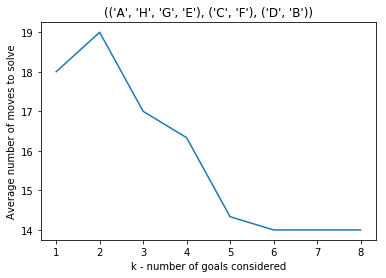

In [64]:
# TODO need to look at problem_record
problem_record_nested = {}
for (problem, k), solves in problem_record.items():
    problem_record_nested.setdefault(problem, {})[k] = np.mean(solves)

# oo multi drops (('C', 'F', 'A'), ('E',), ('D', 'G'), ('H', 'B'))
# snakey? (('D', 'G', 'E', 'C'), ('B', 'F'), ('H', 'A'))
# interesting (and large) variance (('G', 'B', 'F', 'C'), ('A',), ('E', 'H', 'D'))
print(f'in total, have {len(problem_record_nested)} problems')

problem = random.choice(list(problem_record_nested.keys()))
print(problem)
problem = (('A', 'H', 'G', 'E'), ('C', 'F'), ('D', 'B'))




problem_k_to_length = problem_record_nested[problem]
ks = range(1, max(problem_k_to_length.keys())+1)
plt.figure()
plt.plot(ks, [problem_k_to_length[k] for k in ks])
plt.title(problem)
plt.xlabel('k - number of goals considered')
plt.ylabel('Average number of moves to solve')

In [62]:
def score_k_differentiability(problem_k_to_length):
    ks = range(1, max(problem_k_to_length.keys())+1)
    num_moves = [problem_k_to_length[k] for k in ks]

    # HACK might be better to get the actual range instead?
    # This may not work for various reasons...
    moves_range = num_moves[0]-num_moves[-1]

    num_drops = sum(1 if num_moves[idx-1] > num_moves[idx] else 0 for idx in range(1, len(num_moves)))

    # We want considering more goals to mean you will be more efficient
    # We also think that it's best for this efficiency to be well-distributed
    # across the different k, so upweight based on that.
    return moves_range + 5 * (num_drops-1)


probs = [
    # interesting probs
    (('C', 'F', 'A'), ('E',), ('D', 'G'), ('H', 'B')),
    (('D', 'G', 'E', 'C'), ('B', 'F'), ('H', 'A')),
    (('G', 'B', 'F', 'C'), ('A',), ('E', 'H', 'D')),
    # not interesting
    # 2 drops, but only 1 overall decrease
    (('C', 'E'), ('B',), ('F', 'A', 'D')),
    # flat line
    (('G', 'E', 'D'), ('C',), ('A', 'F', 'B'))
]

for p in probs:
    print('score', score_k_differentiability(problem_record_nested[p]))

score 12.333333333333334
score 12.0
score 15.0
score 6.0
score -5.0


In [75]:
problems = list(problem_record_nested.keys())
problem_scores = [score_k_differentiability(problem_record_nested[p]) for p in problems]

for pidx in sorted(range(len(problems)), key=lambda pidx: problem_scores[pidx], reverse=True)[:30]:
    p = problems[pidx]
    print(problem_scores[pidx], p, problem_record_nested[p])


24.0 (('G', 'F', 'D'), ('E', 'H', 'B', 'A', 'C'), ()) {1: 24.0, 2: 18.0, 3: 17.333333333333332, 4: 17.666666666666668, 5: 17.0, 6: 15.0, 7: 15.0, 8: 15.0}
19.0 (('A', 'H', 'G', 'E'), ('C', 'F'), ('D', 'B')) {1: 18.0, 2: 19.0, 3: 17.0, 4: 16.333333333333332, 5: 14.333333333333334, 6: 14.0, 7: 14.0, 8: 14.0}
19.0 (('D', 'C'), ('F', 'G', 'B'), ('E', 'H'), ('A',)) {1: 15.0, 2: 13.0, 3: 13.333333333333334, 4: 13.0, 5: 11.333333333333334, 6: 11.0, 7: 11.0}
17.666666666666664 (('G', 'D', 'C'), ('F', 'B'), (), ('E', 'A')) {1: 12.666666666666666, 2: 11.0, 3: 10.666666666666666, 4: 10.333333333333334, 5: 10.0, 6: 10.0, 7: 10.0}
17.333333333333336 (('C', 'G', 'A'), ('E',), ('F', 'B', 'D'), ()) {1: 14.333333333333334, 2: 13.666666666666666, 3: 13.333333333333334, 4: 12.0, 5: 12.333333333333334, 6: 12.0, 7: 12.0}
17.0 (('D',), ('E', 'G', 'B', 'C', 'A', 'F'), ()) {1: 21.0, 2: 17.0, 3: 16.0, 4: 14.0, 5: 14.0, 6: 14.0, 7: 14.0}
16.333333333333336 (('D',), ('F', 'E', 'G', 'H', 'B', 'A'), ('C',)) {1: 15

In [74]:
# Trying to figure out if state canonicalization helps our perf as branching factor gets large

initial = (('B',), ('D', 'E'), ('F', 'C', 'G', 'A'))
letters = sorted([l for ls in initial for l in ls])
goals = []
for top, bottom in reversed(list(zip(letters[:-1], letters[1:]))):
    print('Goal {}: {} on top of {}'.format(len(goals), top, bottom))
    goals.append(Blockworld.make_above_predicate(top, bottom))
goals_with_clearing = [Blockworld.make_is_bottom_of_column_predicate(letters[-1])]+goals

def _try_to_solve_this_thing(problem, k):
    results = [
        # returns history, solved
        solve_using_ordered_goal_subset(problem, k=k)
        for _ in range(3)
    ]


#problem = Blockworld(initial, goals_with_clearing)

%timeit _try_to_solve_this_thing(Blockworld(initial, goals_with_clearing), 6)
%timeit _try_to_solve_this_thing(Blockworld(initial, goals_with_clearing, canonicalize_states=True), 6)
%timeit _try_to_solve_this_thing(Blockworld(initial, goals_with_clearing), 7)
%timeit _try_to_solve_this_thing(Blockworld(initial, goals_with_clearing, canonicalize_states=True), 7)

Goal 0: F on top of G
Goal 1: E on top of F
Goal 2: D on top of E
Goal 3: C on top of D
Goal 4: B on top of C
Goal 5: A on top of B
9.46 s ± 274 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
7.93 s ± 274 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.4 s ± 620 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
11.4 s ± 460 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


### Exploring some suboptimalities

In [ ]:
# Why does this fail for even k=4? # moves in 5 trials [29, 29, 29, 29, 29]
badstate1 = (('E', 'A', 'D'), ('C', 'F'), ('B',))
# or this one fails up to k=3
badstate2 = ((), ('A', 'C', 'F'), ('E', 'D', 'B'))

# In general, this class of issue seems to have to do with not clearing underneath the largest block...
# So, if you're considering k "on top of" goals, then you'll optimize with respect to up to k letters
# away from your current one. Otherwise, you might leave k+1 letters and further underneath. So in general
# 'A' will get stuck underneath an F if we don't explicitly clear F.

print('goals without clearing:')
p = Blockworld(badstate1, goals)
history, solved = solve_using_ordered_goal_subset(p, k=3)
assert not solved
print('not solved')

# So when we add clearing as a goal, this all gets nicely resolved:
print('goals with clearing:')
p = Blockworld(badstate1, goals_with_clearing)
history, solved = solve_using_ordered_goal_subset(p, k=3)
assert solved
print('solved in {} moves'.format(len(history)-1))

In [ ]:
state = (('B', 'A', 'E', 'F'), (), ('C', 'D'))
# How is this optimal with k=1?
# After seeing the below with debug=True, it seems this is optimal because there aren't opportunities to
# achieve bad intermediate states. So for instance, once E is on F on column 2, D and C
# are already in the right order to stack. while we do have to shift A around to get B
# on top, we can't block future moves by doing that. So, this is a case where we can't
# create bad intermediate states.

p = Blockworld(state, goals_with_clearing)

print('optimal', bfs_search(p))

history, solved = solve_using_ordered_goal_subset(p, k=1, debug=False)
print('using k=1', [a for a, s in history if a])

In [ ]:
# Why does this sometimes do poorly for k=1?: # moves [29, 7, 7, 7, 29]
state = (('B', 'A', 'E', 'F'), (), ('C', 'D'))

# Answer: This does poorly because we sometimes stack F on top of D, which is a weird thing to do and
# sort of related to the previous cell's long answer. When we add the "clearing" goal (that F is on bottom)
# this is a non-issue.

p = Blockworld(state, goals)

print('optimal', bfs_search(p))

for _ in range(10):
    history, solved = solve_using_ordered_goal_subset(p, k=1, debug=False)
    if not solved:
        print('rendering suboptimal solution')
        for a, s in history:
            print(p.render(s))
        break
